In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
df_ = pd.read_csv("insurance.csv")
df = df_.copy()

In [2]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.shape

(1338, 7)

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
num_cols = ["age", "bmi","children","charges"]
df[num_cols].corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<Axes: >

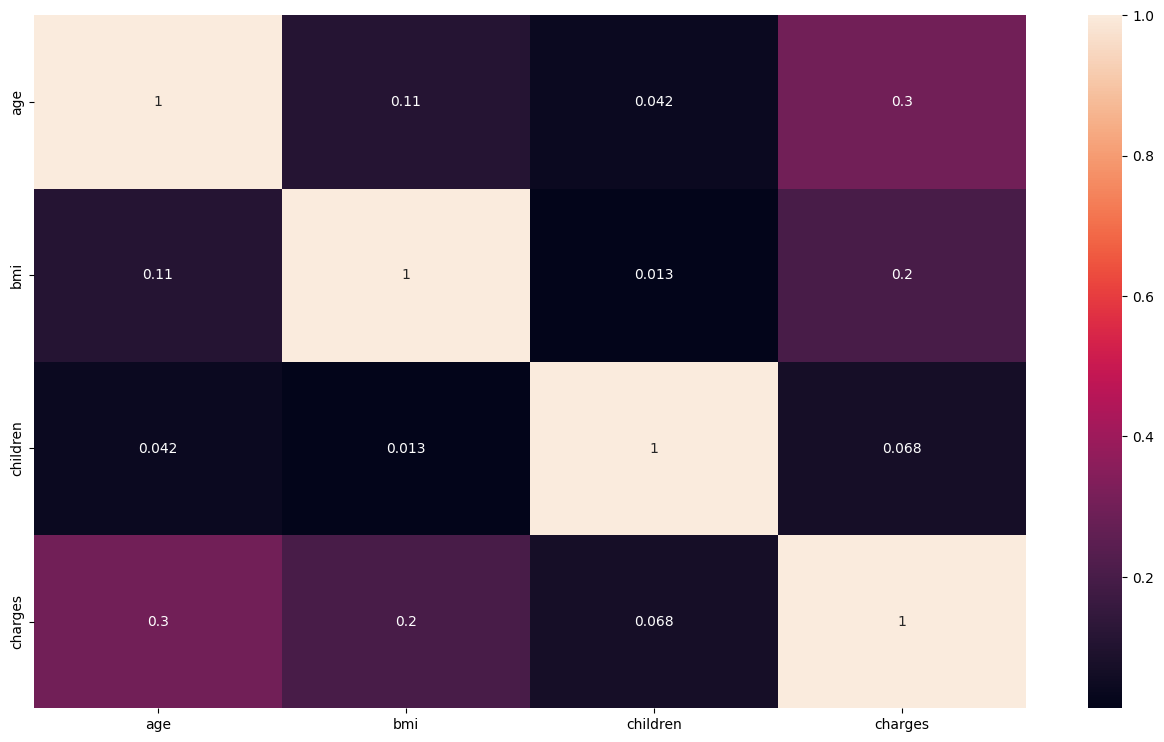

In [9]:
plt.figure(figsize=(16,9))
sns.heatmap(df[num_cols].corr(),annot=True)

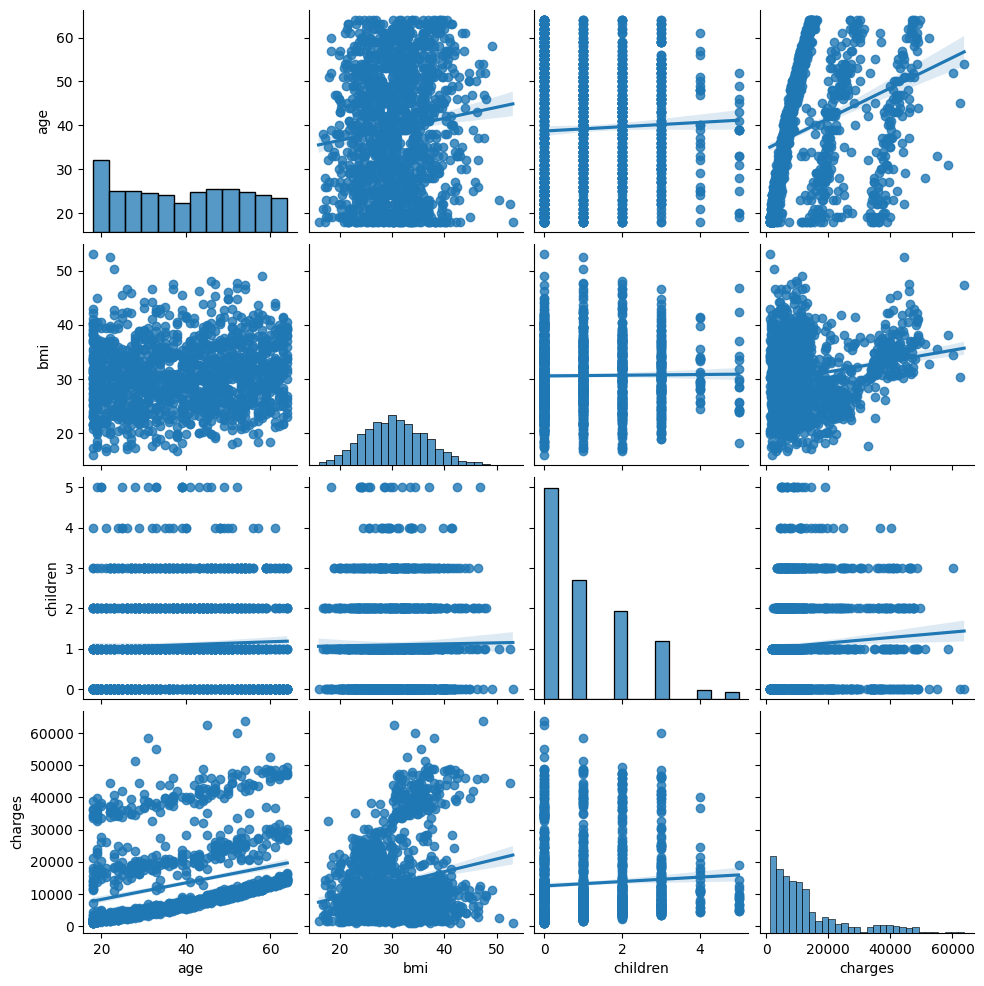

In [10]:
import seaborn as sns
sns.pairplot(df, kind ="reg")

In [ ]:
############### LINEAR REGRESSION ##################

In [11]:
from sklearn.linear_model import LinearRegression
df_ = pd.read_csv("insurance.csv")
df = df_.copy()

In [12]:
X= df[["age"]]
y=df["charges"]
reg = LinearRegression()
model = reg.fit(X,y)
model.intercept_
model.coef_

array([257.72261867])

In [13]:
model.score(X,y)

0.08940589967885804

In [14]:
model.predict(X)[0:10]

array([ 8062.61476073,  7804.89214207, 10382.11832874, 11670.73142207,
       11413.0088034 , 11155.28618474, 15021.12546474, 12701.62189674,
       12701.62189674, 18629.24212608])

In [15]:
y[0:10]

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
5     3756.62160
6     8240.58960
7     7281.50560
8     6406.41070
9    28923.13692
Name: charges, dtype: float64

In [16]:
from sklearn.metrics import r2_score, mean_squared_error

In [17]:
reg.predict(X)[0:10]

array([ 8062.61476073,  7804.89214207, 10382.11832874, 11670.73142207,
       11413.0088034 , 11155.28618474, 15021.12546474, 12701.62189674,
       12701.62189674, 18629.24212608])

In [18]:
y[0:10] # , "fark": y[0:10] - reg.predict(X)[0:10]

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
5     3756.62160
6     8240.58960
7     7281.50560
8     6406.41070
9    28923.13692
Name: charges, dtype: float64

In [19]:
k_t = pd.DataFrame({"gercek_y": y[0:10],
                    "tahmin_y": reg.predict(X)[0:10]} )
k_t

,gercek_y,tahmin_y
0,16884.92400,8062.614761
1,1725.55230,7804.892142
2,4449.46200,10382.118329
3,21984.47061,11670.731422
4,3866.85520,11413.008803
5,3756.62160,11155.286185
6,8240.58960,15021.125465
7,7281.50560,12701.621897
8,6406.41070,12701.621897
9,28923.13692,18629.242126


In [20]:
k_t["hata"] = k_t["gercek_y"] - k_t["tahmin_y"]
k_t

,gercek_y,tahmin_y,hata
0,16884.92400,8062.614761,8822.309239
1,1725.55230,7804.892142,-6079.339842
2,4449.46200,10382.118329,-5932.656329
3,21984.47061,11670.731422,10313.739188
4,3866.85520,11413.008803,-7546.153603
5,3756.62160,11155.286185,-7398.664585
6,8240.58960,15021.125465,-6780.535865
7,7281.50560,12701.621897,-5420.116297
8,6406.41070,12701.621897,-6295.211197
9,28923.13692,18629.242126,10293.894794


In [21]:
k_t["hata_kare"] = k_t["hata"]**2
k_t

,gercek_y,tahmin_y,hata,hata_kare
0,16884.92400,8062.614761,8822.309239,7.783314e+07
1,1725.55230,7804.892142,-6079.339842,3.695837e+07
2,4449.46200,10382.118329,-5932.656329,3.519641e+07
3,21984.47061,11670.731422,10313.739188,1.063732e+08
4,3866.85520,11413.008803,-7546.153603,5.694443e+07
5,3756.62160,11155.286185,-7398.664585,5.474024e+07
6,8240.58960,15021.125465,-6780.535865,4.597567e+07
7,7281.50560,12701.621897,-5420.116297,2.937766e+07
8,6406.41070,12701.621897,-6295.211197,3.962968e+07
9,28923.13692,18629.242126,10293.894794,1.059643e+08


In [22]:
np.sum(k_t["hata_kare"])

588993093.5467993

In [23]:
np.mean(k_t["hata_kare"])

58899309.35467993

In [24]:
np.sqrt(np.mean(k_t["hata_kare"]))

7674.588546279203

In [ ]:
############ MULTIPLE LINEAR REGRESSION ###############

In [25]:
df_ = pd.read_csv("insurance.csv")
df = df_.copy()

In [26]:
df["sex"].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [27]:
df["sex"].replace({"female":0, "male":1}, inplace=True)
df["sex"].head(3)

0    0
1    1
2    1
Name: sex, dtype: int64

In [28]:
df["smoker"].replace({"yes":1, "no":0}, inplace=True)
df["smoker"].head(3)

0    1
1    0
2    0
Name: smoker, dtype: int64

In [29]:
df_new = pd.get_dummies(df, columns=["region"], drop_first=True, dtype=int)
df_new.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


In [30]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [31]:
df_new.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [32]:
X = df_new.drop("charges", axis=1)
y = df_new["charges"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)
print("X_train", X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)
training = df.copy()
print("training", training.shape)


X_train (1070, 8)
y_train (1070,)
X_test (268, 8)
y_test (268,)
training (1338, 7)


In [33]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [34]:
model.intercept_

-11931.21905032667

In [35]:
model.coef_

array([ 2.56975706e+02, -1.85916916e+01,  3.37092552e+02,  4.25278784e+02,
        2.36511289e+04, -3.70677326e+02, -6.57864297e+02, -8.09799354e+02])

In [36]:
rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
rmse

6105.545160099847

In [37]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
r2


0.7835929767120724

In [ ]:
##################### PRINCIPAL COMPANENT REGRESSION (PCR) ##################

In [38]:

X = df_new.drop("charges", axis=1)
y = df_new["charges"]


X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [39]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
pca = PCA()



In [40]:
X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_train[0:1,:]

array([[-1.88620549, -1.21402573, -1.17225676, -0.45388227, -1.15169913,
        -0.4328831 ,  0.10302859, -0.42643816]])

In [41]:

np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)[0:7] # Verinin ½ kaçını ifade ediyor



array([18.52, 35.19, 49.05, 62.33, 74.46, 85.88, 95.98])

In [42]:
lm = LinearRegression()

In [43]:
pcr_model = lm.fit(X_reduced_train, y_train)

In [44]:
pcr_model.intercept_

13267.935817337988

In [45]:
pcr_model.coef_

array([1756.31102035, -703.83233604,  593.15829366, 6607.4881757 ,
       1481.67171006, 7673.26838145,  136.58091633,  657.10330558])

In [46]:
y_pred = pcr_model.predict(X_reduced_train)

In [47]:
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
rmse

6083.132596294014

In [48]:
r2 = r2_score(y_train,y_pred)
r2


0.7449555328228536

In [50]:
pca2 = PCA()

In [51]:
X_reduced_test = pca2.fit_transform(scale(X_test))

In [52]:
y_pred = pcr_model.predict(X_reduced_test)

In [53]:
np.sqrt(mean_squared_error(y_test,y_pred))

10108.34157126414

In [ ]:
## Model Tunning ##

In [54]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train[:,0:10], y_train)
y_pred = pcr_model.predict(X_reduced_test[:,0:10])
print(np.sqrt(mean_squared_error(y_test, y_pred)))

10108.34157126414


In [55]:
from sklearn import model_selection

In [56]:
cv_10 = model_selection.KFold(n_splits=10,
                              shuffle=True,
                              random_state=17)

In [57]:
lm = LinearRegression()

In [58]:
RMSE = []

In [59]:


for i in np.arange(1, X_reduced_train.shape[1] + 1):
    
    score = np.sqrt(-1*model_selection.cross_val_score(lm, 
                                                       X_reduced_train[:,:i], 
                                                       y_train.ravel(), 
                                                       cv=cv_10, 
                                                       scoring='neg_mean_squared_error').mean())
    RMSE.append(score)



In [60]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Charges  İçin PCR Model Tuning')

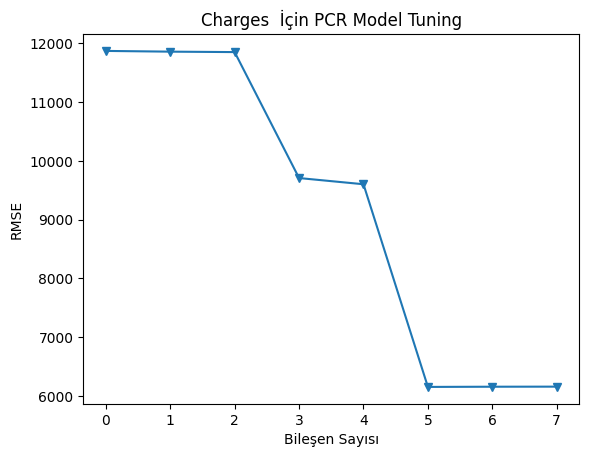

In [61]:


plt.plot(RMSE, '-v')
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Charges  İçin PCR Model Tuning')



In [62]:
lm = LinearRegression()

In [63]:

pcr_model = lm.fit(X_reduced_train[:,0:6], y_train)
y_pred = pcr_model.predict(X_reduced_train[:,0:6])
print(np.sqrt(mean_squared_error(y_train, y_pred)))

6095.741419224257


In [64]:

y_pred = pcr_model.predict(X_reduced_test[:,0:6])

In [65]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

10092.160869608935


In [66]:
################## PARTIAL LEAST SQUARES (PLS)################

In [67]:
X = df_new.drop("charges", axis=1)
y = df_new["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [68]:
from sklearn.cross_decomposition import PLSRegression, PLSSVD

In [69]:
pls_model = PLSRegression().fit(X_train, y_train)

In [70]:
pls_model.intercept_

array([13267.93581734])

In [71]:
pls_model.coef_

array([[3631.98651194,  168.59943841, 1955.93238871,  661.55069373,
        9550.59232554,   49.95182849, -188.52870391, -164.3696987 ]])

In [72]:
y_pred = pls_model.predict(X_train)

In [73]:
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
rmse


6090.165244279749

In [74]:
r2 = r2_score(y_train,y_pred)
r2


0.7443654832938336

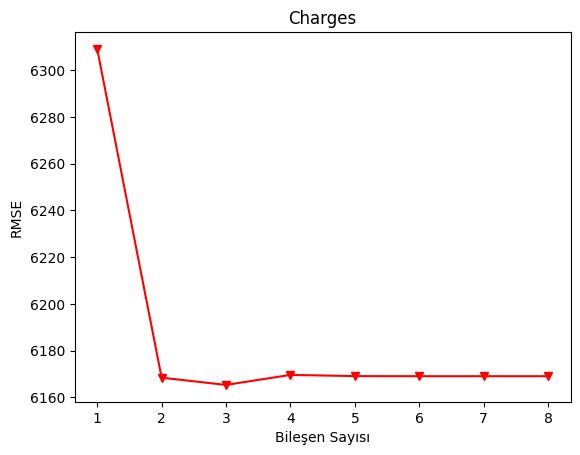

In [75]:

#CV
cv_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)


#Hata hesaplamak için döngü
RMSE = []

for i in np.arange(1, X_train.shape[1] + 1):
    pls = PLSRegression(n_components=i)
    score = np.sqrt(-1*cross_val_score(pls, X_train, y_train, cv=cv_10, scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

#Sonuçların Görselleştirilmesi
plt.plot(np.arange(1, X_train.shape[1] + 1), np.array(RMSE), '-v', c = "r")
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Charges');



In [76]:
pls_model = PLSRegression(n_components = 2).fit(X_train, y_train)

In [77]:
y_pred = pls_model.predict(X_test)

In [78]:
np.sqrt(mean_squared_error(y_test, y_pred))

5936.600875862916

In [79]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
r2


0.7671753976426077

In [ ]:
############## RIDGE REGRESSION ##############

In [80]:
X = df_new.drop("charges", axis=1)
y = df_new["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [81]:
from sklearn.linear_model import Ridge

In [82]:
ridge_model = Ridge(alpha = 0.1).fit(X_train, y_train)

In [83]:
ridge_model.intercept_
ridge_model.coef_

array([  259.60881732,    46.26923873,   339.7827271 ,   426.61780902,
       23615.86640418,  -354.67668756,  -779.86043964,  -859.47010444])

In [84]:
10**np.linspace(10,-2,100)*0.5 

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

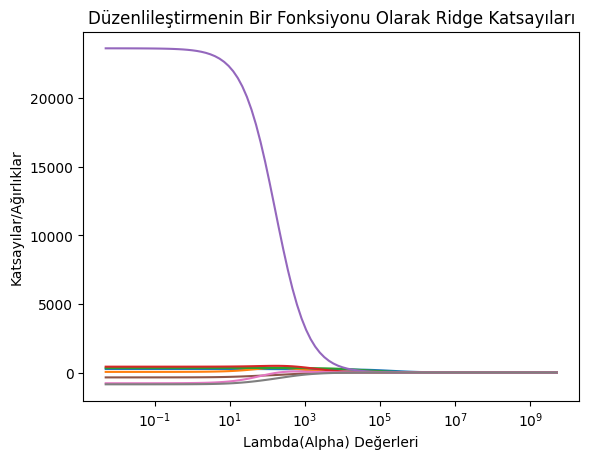

In [85]:
lambdalar = 10**np.linspace(10,-2,100)*0.5 

ridge_model = Ridge()
katsayilar = []

for i in lambdalar:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train, y_train) 
    katsayilar.append(ridge_model.coef_) 
    

    
ax = plt.gca()
ax.plot(lambdalar, katsayilar) 
ax.set_xscale('log') 

plt.xlabel('Lambda(Alpha) Değerleri')
plt.ylabel('Katsayılar/Ağırlıklar')
plt.title('Düzenlileştirmenin Bir Fonksiyonu Olarak Ridge Katsayıları');

In [86]:
y_pred =ridge_model.predict(X_test)

In [87]:
np.sqrt(mean_squared_error(y_test, y_pred))

5926.040797203065

In [88]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
r2


0.7671753976426077

In [89]:
############### Lasso Regresyon #################

In [90]:
X = df_new.drop("charges", axis=1)
y = df_new["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [91]:
from sklearn.linear_model import Lasso

In [92]:
lasso_model = Lasso(alpha=0.1).fit(X_train, y_train)

In [93]:
lasso_model

Lasso(alpha=0.1)

In [94]:
lasso_model.intercept_
lasso_model.coef_

array([  259.62305488,    45.26653818,   339.78334233,   426.44697591,
       23629.83496324,  -353.53309135,  -779.69429566,  -858.64525039])

Text(0, 0.5, 'weights')

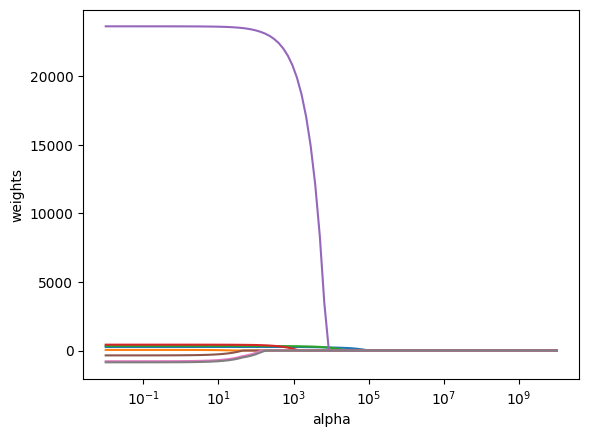

In [95]:
lasso = Lasso()
lambdalar = 10**np.linspace(10,-2,100)*0.5 
katsayilar = []

for i in lambdalar:
    lasso.set_params(alpha=i)
    lasso.fit(X_train, y_train)
    katsayilar.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(lambdalar*2, katsayilar)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [96]:
y_pred = lasso_model.predict(X_test)

In [97]:
np.sqrt(mean_squared_error(y_test, y_pred))

5926.050324659223

In [98]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
r2


0.7671753976426077

In [ ]:
############# ElastikNet Regression ###############

In [99]:
X = df_new.drop("charges", axis=1)
y = df_new["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [100]:
from sklearn.linear_model import ElasticNet

In [101]:
enet_model= ElasticNet().fit(X_train, y_train)

In [102]:
enet_model.intercept_
enet_model.coef_

array([ 240.41474906,  281.86074586,  324.55920626,  445.43637032,
       5799.97937013, -111.8679042 ,   74.28799596, -247.8768802 ])

In [103]:
enet_model

ElasticNet()

In [104]:
enet_model.predict(X_test)

array([12051.64627215, 10457.66224011, 21971.76147231, 13092.48898076,
       13069.11411395, 14748.44345886,  3934.79466305, 20030.28530108,
        4514.57345606, 14769.56009039, 14473.29125748, 13017.46821948,
        9266.79080847, 24467.92987108, 26033.30758201, 23156.16135646,
       18769.00217002, 21679.13247381, 12854.02036486, 16923.05174203,
        8199.83127956, 14014.6527462 ,  6639.7957743 , 10379.53549075,
       14543.11534603, 15760.32311607, 17740.36800941,  9753.5711079 ,
       12994.9726392 ,  6637.16050778, 12831.37511313, 16092.2013377 ,
        8611.70905474,  7083.17164962,  8638.31170555, 16190.93546502,
        5985.96407183, 12411.04577311, 18638.06024064, 18852.31131503,
        8000.91030878,  8250.81661376, 17451.33682787, 14789.0722338 ,
       12955.03163148, 15760.60040891,  8913.97247945,  7156.92147557,
       21675.99788793, 13331.0384379 , 19173.24818027,  6832.68628927,
       15564.73255809,  5259.76729866, 17165.27996698, 15786.39885876,
      

In [105]:
y_pred = enet_model.predict(X_test)

In [106]:
np.sqrt(mean_squared_error(y_test, y_pred))

9527.622391552004

In [107]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
r2


0.7671753976426077

In [108]:
###############  SCORES ##################

In [109]:
veriler = {"Model": ["Multiple_linear", "PCR", "PLS", "Ridge_", "Lasso_", "ElasticNet_"],
          "RMSE" : [6105.5451, 6083.1325, 6090.1652, 5926.0407, 5926.0503, 9527.6223],
          "R2":[0.7835, 0.7449, 0.7443, 0.7671, 0.7671, 0.7671]}
           

In [111]:
df_scores = pd.DataFrame(veriler)
df_scores.head(6)

,Model,RMSE,R2
0,Multiple_linear,6105.5451,0.7835
1,PCR,6083.1325,0.7449
2,PLS,6090.1652,0.7443
3,Ridge_,5926.0407,0.7671
4,Lasso_,5926.0503,0.7671
5,ElasticNet_,9527.6223,0.7671


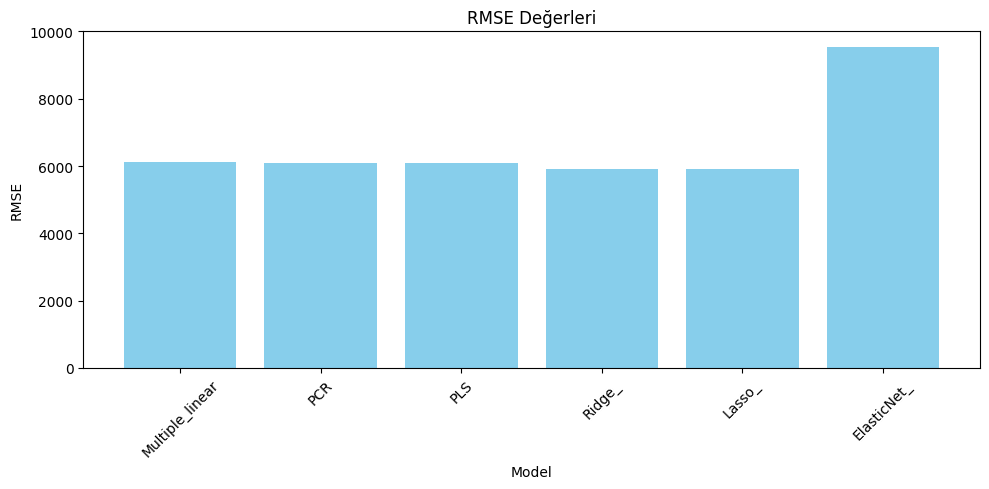

In [112]:
plt.figure(figsize=(10, 5))
plt.bar(df_scores["Model"], df_scores["RMSE"], color='skyblue')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE Değerleri')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

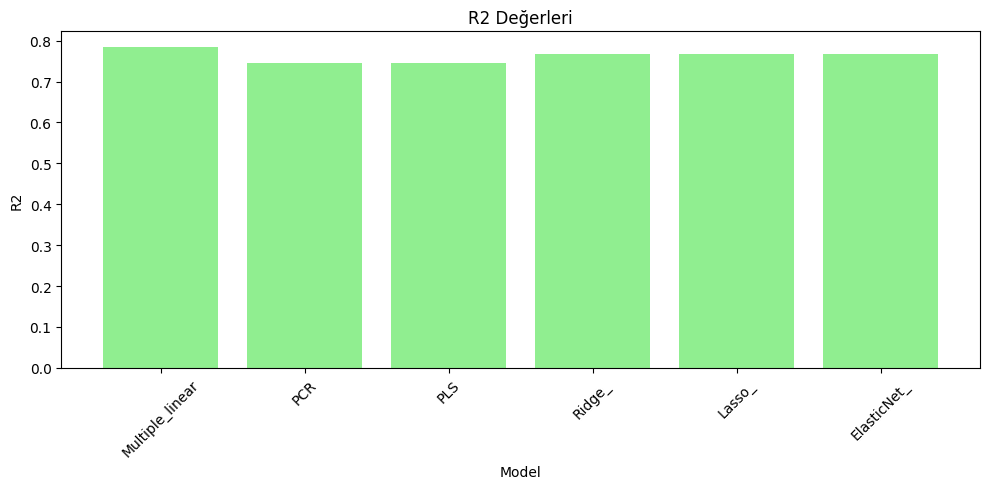

In [113]:
plt.figure(figsize=(10, 5))
plt.bar(df_scores["Model"], df_scores["R2"], color='lightgreen')
plt.xlabel('Model')
plt.ylabel('R2')
plt.title('R2 Değerleri')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
